In [1]:
import os
import numpy as np
import efficientnet.tfkeras
from tensorflow.keras.models import load_model
import pandas as pd

os.environ["CUDA_VISIBLE_DEVICES"]="0"

#load mode
model_dir ='/media/tohn/HDD2/car-dataset-2025/model_h5_degree/models/B5R3_degree_200epoch.h5' #แก้
model = load_model(model_dir)
height = width = model.input_shape[1]

In [2]:
# training CSV file
dataframe = pd.read_csv (r'/home/yupaporn/codes/Train_Part-Degree/train_class_degree.csv')
valframe = pd.read_csv (r'/home/yupaporn/codes/Train_Part-Degree/val_class_degree.csv')
print(dataframe.shape)
print(valframe.shape)

# training images path 
DATA_PATH = "/media/tohn/HDD2/car-dataset-2025"
os.chdir(DATA_PATH)
train_dir = os.path.join(DATA_PATH, 'Train')
print(train_dir)
validation_dir = os.path.join(DATA_PATH, 'Valid')
print(validation_dir)

(16000, 8)
(3200, 8)
/media/tohn/HDD2/car-dataset-2025/Train
/media/tohn/HDD2/car-dataset-2025/Valid


In [3]:
batch_size = 1
epochs = 10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      brightness_range=[0.5,1.5],
      shear_range=0.4,
      zoom_range=0.2,
      horizontal_flip=False,
      fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe = dataframe,
        directory = train_dir,
        x_col = 'img_path',
        y_col = 'class_degree',
        target_size = (height, width),
        batch_size=batch_size,
        color_mode= 'rgb',
        class_mode='categorical')
test_generator = test_datagen.flow_from_dataframe(
        dataframe = valframe,
        directory = validation_dir,
        x_col = 'img_path',
        y_col = 'class_degree',
        target_size = (height, width),
        batch_size=batch_size,
        color_mode= 'rgb',
        class_mode='categorical')
#label
labels = (train_generator.class_indices)
labels = dict((v,k.replace("C","")) for k,v in labels.items())
print(labels)

Found 16000 validated image filenames belonging to 4 classes.
Found 3200 validated image filenames belonging to 4 classes.
{0: 'Base', 1: 'Minor', 2: 'Moderate', 3: 'Severe'}


In [4]:
dataframe = pd.read_csv (r'/home/yupaporn/codes/Train_Part-Degree/output2.csv')
test = dataframe[dataframe['split'] == 'Test']
test = test

In [5]:
set(dataframe['split'])

{'Test', 'Test(real)', 'Train', 'Train(fine-tune)', 'Valid'}

In [6]:
from tensorflow.keras.preprocessing import image
def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model.predict([x])
    
    return result[0]

# Predict
pred_list = list()
prob_list = list()
img_path=test['img_path'].tolist()
for i in range(0,len(img_path)):
    print(f'on processing {i+1}/{len(img_path)-(i+1)}')
    predict = predict_image(img_path[i])
    result = np.argmax(predict)
    pred_list.append(labels[result])
    prob_list.append(predict[result])

test['category'] = pred_list
test['Prob'] = prob_list

on processing 1/17999
on processing 2/17998
on processing 3/17997
on processing 4/17996
on processing 5/17995
on processing 6/17994
on processing 7/17993
on processing 8/17992
on processing 9/17991
on processing 10/17990
on processing 11/17989
on processing 12/17988
on processing 13/17987
on processing 14/17986
on processing 15/17985
on processing 16/17984
on processing 17/17983
on processing 18/17982
on processing 19/17981
on processing 20/17980
on processing 21/17979
on processing 22/17978
on processing 23/17977
on processing 24/17976
on processing 25/17975
on processing 26/17974
on processing 27/17973
on processing 28/17972
on processing 29/17971
on processing 30/17970
on processing 31/17969
on processing 32/17968
on processing 33/17967
on processing 34/17966
on processing 35/17965
on processing 36/17964
on processing 37/17963
on processing 38/17962
on processing 39/17961
on processing 40/17960
on processing 41/17959
on processing 42/17958
on processing 43/17957
on processing 44/179

on processing 347/17653
on processing 348/17652
on processing 349/17651
on processing 350/17650
on processing 351/17649
on processing 352/17648
on processing 353/17647
on processing 354/17646
on processing 355/17645
on processing 356/17644
on processing 357/17643
on processing 358/17642
on processing 359/17641
on processing 360/17640
on processing 361/17639
on processing 362/17638
on processing 363/17637
on processing 364/17636
on processing 365/17635
on processing 366/17634
on processing 367/17633
on processing 368/17632
on processing 369/17631
on processing 370/17630
on processing 371/17629
on processing 372/17628
on processing 373/17627
on processing 374/17626
on processing 375/17625
on processing 376/17624
on processing 377/17623
on processing 378/17622
on processing 379/17621
on processing 380/17620
on processing 381/17619
on processing 382/17618
on processing 383/17617
on processing 384/17616
on processing 385/17615
on processing 386/17614
on processing 387/17613
on processing 38

on processing 692/17308
on processing 693/17307
on processing 694/17306
on processing 695/17305
on processing 696/17304
on processing 697/17303
on processing 698/17302
on processing 699/17301
on processing 700/17300
on processing 701/17299
on processing 702/17298
on processing 703/17297
on processing 704/17296
on processing 705/17295
on processing 706/17294
on processing 707/17293
on processing 708/17292
on processing 709/17291
on processing 710/17290
on processing 711/17289
on processing 712/17288
on processing 713/17287
on processing 714/17286
on processing 715/17285
on processing 716/17284
on processing 717/17283
on processing 718/17282
on processing 719/17281
on processing 720/17280
on processing 721/17279
on processing 722/17278
on processing 723/17277
on processing 724/17276
on processing 725/17275
on processing 726/17274
on processing 727/17273
on processing 728/17272
on processing 729/17271
on processing 730/17270
on processing 731/17269
on processing 732/17268
on processing 73

on processing 1034/16966
on processing 1035/16965
on processing 1036/16964
on processing 1037/16963
on processing 1038/16962
on processing 1039/16961
on processing 1040/16960
on processing 1041/16959
on processing 1042/16958
on processing 1043/16957
on processing 1044/16956
on processing 1045/16955
on processing 1046/16954
on processing 1047/16953
on processing 1048/16952
on processing 1049/16951
on processing 1050/16950
on processing 1051/16949
on processing 1052/16948
on processing 1053/16947
on processing 1054/16946
on processing 1055/16945
on processing 1056/16944
on processing 1057/16943
on processing 1058/16942
on processing 1059/16941
on processing 1060/16940
on processing 1061/16939
on processing 1062/16938
on processing 1063/16937
on processing 1064/16936
on processing 1065/16935
on processing 1066/16934
on processing 1067/16933
on processing 1068/16932
on processing 1069/16931
on processing 1070/16930
on processing 1071/16929
on processing 1072/16928
on processing 1073/16927


on processing 1362/16638
on processing 1363/16637
on processing 1364/16636
on processing 1365/16635
on processing 1366/16634
on processing 1367/16633
on processing 1368/16632
on processing 1369/16631
on processing 1370/16630
on processing 1371/16629
on processing 1372/16628
on processing 1373/16627
on processing 1374/16626
on processing 1375/16625
on processing 1376/16624
on processing 1377/16623
on processing 1378/16622
on processing 1379/16621
on processing 1380/16620
on processing 1381/16619
on processing 1382/16618
on processing 1383/16617
on processing 1384/16616
on processing 1385/16615
on processing 1386/16614
on processing 1387/16613
on processing 1388/16612
on processing 1389/16611
on processing 1390/16610
on processing 1391/16609
on processing 1392/16608
on processing 1393/16607
on processing 1394/16606
on processing 1395/16605
on processing 1396/16604
on processing 1397/16603
on processing 1398/16602
on processing 1399/16601
on processing 1400/16600
on processing 1401/16599


on processing 1692/16308
on processing 1693/16307
on processing 1694/16306
on processing 1695/16305
on processing 1696/16304
on processing 1697/16303
on processing 1698/16302
on processing 1699/16301
on processing 1700/16300
on processing 1701/16299
on processing 1702/16298
on processing 1703/16297
on processing 1704/16296
on processing 1705/16295
on processing 1706/16294
on processing 1707/16293
on processing 1708/16292
on processing 1709/16291
on processing 1710/16290
on processing 1711/16289
on processing 1712/16288
on processing 1713/16287
on processing 1714/16286
on processing 1715/16285
on processing 1716/16284
on processing 1717/16283
on processing 1718/16282
on processing 1719/16281
on processing 1720/16280
on processing 1721/16279
on processing 1722/16278
on processing 1723/16277
on processing 1724/16276
on processing 1725/16275
on processing 1726/16274
on processing 1727/16273
on processing 1728/16272
on processing 1729/16271
on processing 1730/16270
on processing 1731/16269


on processing 2022/15978
on processing 2023/15977
on processing 2024/15976
on processing 2025/15975
on processing 2026/15974
on processing 2027/15973
on processing 2028/15972
on processing 2029/15971
on processing 2030/15970
on processing 2031/15969
on processing 2032/15968
on processing 2033/15967
on processing 2034/15966
on processing 2035/15965
on processing 2036/15964
on processing 2037/15963
on processing 2038/15962
on processing 2039/15961
on processing 2040/15960
on processing 2041/15959
on processing 2042/15958
on processing 2043/15957
on processing 2044/15956
on processing 2045/15955
on processing 2046/15954
on processing 2047/15953
on processing 2048/15952
on processing 2049/15951
on processing 2050/15950
on processing 2051/15949
on processing 2052/15948
on processing 2053/15947
on processing 2054/15946
on processing 2055/15945
on processing 2056/15944
on processing 2057/15943
on processing 2058/15942
on processing 2059/15941
on processing 2060/15940
on processing 2061/15939


on processing 2350/15650
on processing 2351/15649
on processing 2352/15648
on processing 2353/15647
on processing 2354/15646
on processing 2355/15645
on processing 2356/15644
on processing 2357/15643
on processing 2358/15642
on processing 2359/15641
on processing 2360/15640
on processing 2361/15639
on processing 2362/15638
on processing 2363/15637
on processing 2364/15636
on processing 2365/15635
on processing 2366/15634
on processing 2367/15633
on processing 2368/15632
on processing 2369/15631
on processing 2370/15630
on processing 2371/15629
on processing 2372/15628
on processing 2373/15627
on processing 2374/15626
on processing 2375/15625
on processing 2376/15624
on processing 2377/15623
on processing 2378/15622
on processing 2379/15621
on processing 2380/15620
on processing 2381/15619
on processing 2382/15618
on processing 2383/15617
on processing 2384/15616
on processing 2385/15615
on processing 2386/15614
on processing 2387/15613
on processing 2388/15612
on processing 2389/15611


on processing 2678/15322
on processing 2679/15321
on processing 2680/15320
on processing 2681/15319
on processing 2682/15318
on processing 2683/15317
on processing 2684/15316
on processing 2685/15315
on processing 2686/15314
on processing 2687/15313
on processing 2688/15312
on processing 2689/15311
on processing 2690/15310
on processing 2691/15309
on processing 2692/15308
on processing 2693/15307
on processing 2694/15306
on processing 2695/15305
on processing 2696/15304
on processing 2697/15303
on processing 2698/15302
on processing 2699/15301
on processing 2700/15300
on processing 2701/15299
on processing 2702/15298
on processing 2703/15297
on processing 2704/15296
on processing 2705/15295
on processing 2706/15294
on processing 2707/15293
on processing 2708/15292
on processing 2709/15291
on processing 2710/15290
on processing 2711/15289
on processing 2712/15288
on processing 2713/15287
on processing 2714/15286
on processing 2715/15285
on processing 2716/15284
on processing 2717/15283


on processing 3007/14993
on processing 3008/14992
on processing 3009/14991
on processing 3010/14990
on processing 3011/14989
on processing 3012/14988
on processing 3013/14987
on processing 3014/14986
on processing 3015/14985
on processing 3016/14984
on processing 3017/14983
on processing 3018/14982
on processing 3019/14981
on processing 3020/14980
on processing 3021/14979
on processing 3022/14978
on processing 3023/14977
on processing 3024/14976
on processing 3025/14975
on processing 3026/14974
on processing 3027/14973
on processing 3028/14972
on processing 3029/14971
on processing 3030/14970
on processing 3031/14969
on processing 3032/14968
on processing 3033/14967
on processing 3034/14966
on processing 3035/14965
on processing 3036/14964
on processing 3037/14963
on processing 3038/14962
on processing 3039/14961
on processing 3040/14960
on processing 3041/14959
on processing 3042/14958
on processing 3043/14957
on processing 3044/14956
on processing 3045/14955
on processing 3046/14954


on processing 3337/14663
on processing 3338/14662
on processing 3339/14661
on processing 3340/14660
on processing 3341/14659
on processing 3342/14658
on processing 3343/14657
on processing 3344/14656
on processing 3345/14655
on processing 3346/14654
on processing 3347/14653
on processing 3348/14652
on processing 3349/14651
on processing 3350/14650
on processing 3351/14649
on processing 3352/14648
on processing 3353/14647
on processing 3354/14646
on processing 3355/14645
on processing 3356/14644
on processing 3357/14643
on processing 3358/14642
on processing 3359/14641
on processing 3360/14640
on processing 3361/14639
on processing 3362/14638
on processing 3363/14637
on processing 3364/14636
on processing 3365/14635
on processing 3366/14634
on processing 3367/14633
on processing 3368/14632
on processing 3369/14631
on processing 3370/14630
on processing 3371/14629
on processing 3372/14628
on processing 3373/14627
on processing 3374/14626
on processing 3375/14625
on processing 3376/14624


on processing 3667/14333
on processing 3668/14332
on processing 3669/14331
on processing 3670/14330
on processing 3671/14329
on processing 3672/14328
on processing 3673/14327
on processing 3674/14326
on processing 3675/14325
on processing 3676/14324
on processing 3677/14323
on processing 3678/14322
on processing 3679/14321
on processing 3680/14320
on processing 3681/14319
on processing 3682/14318
on processing 3683/14317
on processing 3684/14316
on processing 3685/14315
on processing 3686/14314
on processing 3687/14313
on processing 3688/14312
on processing 3689/14311
on processing 3690/14310
on processing 3691/14309
on processing 3692/14308
on processing 3693/14307
on processing 3694/14306
on processing 3695/14305
on processing 3696/14304
on processing 3697/14303
on processing 3698/14302
on processing 3699/14301
on processing 3700/14300
on processing 3701/14299
on processing 3702/14298
on processing 3703/14297
on processing 3704/14296
on processing 3705/14295
on processing 3706/14294


on processing 3995/14005
on processing 3996/14004
on processing 3997/14003
on processing 3998/14002
on processing 3999/14001
on processing 4000/14000
on processing 4001/13999
on processing 4002/13998
on processing 4003/13997
on processing 4004/13996
on processing 4005/13995
on processing 4006/13994
on processing 4007/13993
on processing 4008/13992
on processing 4009/13991
on processing 4010/13990
on processing 4011/13989
on processing 4012/13988
on processing 4013/13987
on processing 4014/13986
on processing 4015/13985
on processing 4016/13984
on processing 4017/13983
on processing 4018/13982
on processing 4019/13981
on processing 4020/13980
on processing 4021/13979
on processing 4022/13978
on processing 4023/13977
on processing 4024/13976
on processing 4025/13975
on processing 4026/13974
on processing 4027/13973
on processing 4028/13972
on processing 4029/13971
on processing 4030/13970
on processing 4031/13969
on processing 4032/13968
on processing 4033/13967
on processing 4034/13966


on processing 4324/13676
on processing 4325/13675
on processing 4326/13674
on processing 4327/13673
on processing 4328/13672
on processing 4329/13671
on processing 4330/13670
on processing 4331/13669
on processing 4332/13668
on processing 4333/13667
on processing 4334/13666
on processing 4335/13665
on processing 4336/13664
on processing 4337/13663
on processing 4338/13662
on processing 4339/13661
on processing 4340/13660
on processing 4341/13659
on processing 4342/13658
on processing 4343/13657
on processing 4344/13656
on processing 4345/13655
on processing 4346/13654
on processing 4347/13653
on processing 4348/13652
on processing 4349/13651
on processing 4350/13650
on processing 4351/13649
on processing 4352/13648
on processing 4353/13647
on processing 4354/13646
on processing 4355/13645
on processing 4356/13644
on processing 4357/13643
on processing 4358/13642
on processing 4359/13641
on processing 4360/13640
on processing 4361/13639
on processing 4362/13638
on processing 4363/13637


on processing 4655/13345
on processing 4656/13344
on processing 4657/13343
on processing 4658/13342
on processing 4659/13341
on processing 4660/13340
on processing 4661/13339
on processing 4662/13338
on processing 4663/13337
on processing 4664/13336
on processing 4665/13335
on processing 4666/13334
on processing 4667/13333
on processing 4668/13332
on processing 4669/13331
on processing 4670/13330
on processing 4671/13329
on processing 4672/13328
on processing 4673/13327
on processing 4674/13326
on processing 4675/13325
on processing 4676/13324
on processing 4677/13323
on processing 4678/13322
on processing 4679/13321
on processing 4680/13320
on processing 4681/13319
on processing 4682/13318
on processing 4683/13317
on processing 4684/13316
on processing 4685/13315
on processing 4686/13314
on processing 4687/13313
on processing 4688/13312
on processing 4689/13311
on processing 4690/13310
on processing 4691/13309
on processing 4692/13308
on processing 4693/13307
on processing 4694/13306


on processing 4985/13015
on processing 4986/13014
on processing 4987/13013
on processing 4988/13012
on processing 4989/13011
on processing 4990/13010
on processing 4991/13009
on processing 4992/13008
on processing 4993/13007
on processing 4994/13006
on processing 4995/13005
on processing 4996/13004
on processing 4997/13003
on processing 4998/13002
on processing 4999/13001
on processing 5000/13000
on processing 5001/12999
on processing 5002/12998
on processing 5003/12997
on processing 5004/12996
on processing 5005/12995
on processing 5006/12994
on processing 5007/12993
on processing 5008/12992
on processing 5009/12991
on processing 5010/12990
on processing 5011/12989
on processing 5012/12988
on processing 5013/12987
on processing 5014/12986
on processing 5015/12985
on processing 5016/12984
on processing 5017/12983
on processing 5018/12982
on processing 5019/12981
on processing 5020/12980
on processing 5021/12979
on processing 5022/12978
on processing 5023/12977
on processing 5024/12976


on processing 5315/12685
on processing 5316/12684
on processing 5317/12683
on processing 5318/12682
on processing 5319/12681
on processing 5320/12680
on processing 5321/12679
on processing 5322/12678
on processing 5323/12677
on processing 5324/12676
on processing 5325/12675
on processing 5326/12674
on processing 5327/12673
on processing 5328/12672
on processing 5329/12671
on processing 5330/12670
on processing 5331/12669
on processing 5332/12668
on processing 5333/12667
on processing 5334/12666
on processing 5335/12665
on processing 5336/12664
on processing 5337/12663
on processing 5338/12662
on processing 5339/12661
on processing 5340/12660
on processing 5341/12659
on processing 5342/12658
on processing 5343/12657
on processing 5344/12656
on processing 5345/12655
on processing 5346/12654
on processing 5347/12653
on processing 5348/12652
on processing 5349/12651
on processing 5350/12650
on processing 5351/12649
on processing 5352/12648
on processing 5353/12647
on processing 5354/12646


on processing 5644/12356
on processing 5645/12355
on processing 5646/12354
on processing 5647/12353
on processing 5648/12352
on processing 5649/12351
on processing 5650/12350
on processing 5651/12349
on processing 5652/12348
on processing 5653/12347
on processing 5654/12346
on processing 5655/12345
on processing 5656/12344
on processing 5657/12343
on processing 5658/12342
on processing 5659/12341
on processing 5660/12340
on processing 5661/12339
on processing 5662/12338
on processing 5663/12337
on processing 5664/12336
on processing 5665/12335
on processing 5666/12334
on processing 5667/12333
on processing 5668/12332
on processing 5669/12331
on processing 5670/12330
on processing 5671/12329
on processing 5672/12328
on processing 5673/12327
on processing 5674/12326
on processing 5675/12325
on processing 5676/12324
on processing 5677/12323
on processing 5678/12322
on processing 5679/12321
on processing 5680/12320
on processing 5681/12319
on processing 5682/12318
on processing 5683/12317


on processing 5975/12025
on processing 5976/12024
on processing 5977/12023
on processing 5978/12022
on processing 5979/12021
on processing 5980/12020
on processing 5981/12019
on processing 5982/12018
on processing 5983/12017
on processing 5984/12016
on processing 5985/12015
on processing 5986/12014
on processing 5987/12013
on processing 5988/12012
on processing 5989/12011
on processing 5990/12010
on processing 5991/12009
on processing 5992/12008
on processing 5993/12007
on processing 5994/12006
on processing 5995/12005
on processing 5996/12004
on processing 5997/12003
on processing 5998/12002
on processing 5999/12001
on processing 6000/12000
on processing 6001/11999
on processing 6002/11998
on processing 6003/11997
on processing 6004/11996
on processing 6005/11995
on processing 6006/11994
on processing 6007/11993
on processing 6008/11992
on processing 6009/11991
on processing 6010/11990
on processing 6011/11989
on processing 6012/11988
on processing 6013/11987
on processing 6014/11986


on processing 6303/11697
on processing 6304/11696
on processing 6305/11695
on processing 6306/11694
on processing 6307/11693
on processing 6308/11692
on processing 6309/11691
on processing 6310/11690
on processing 6311/11689
on processing 6312/11688
on processing 6313/11687
on processing 6314/11686
on processing 6315/11685
on processing 6316/11684
on processing 6317/11683
on processing 6318/11682
on processing 6319/11681
on processing 6320/11680
on processing 6321/11679
on processing 6322/11678
on processing 6323/11677
on processing 6324/11676
on processing 6325/11675
on processing 6326/11674
on processing 6327/11673
on processing 6328/11672
on processing 6329/11671
on processing 6330/11670
on processing 6331/11669
on processing 6332/11668
on processing 6333/11667
on processing 6334/11666
on processing 6335/11665
on processing 6336/11664
on processing 6337/11663
on processing 6338/11662
on processing 6339/11661
on processing 6340/11660
on processing 6341/11659
on processing 6342/11658


on processing 6632/11368
on processing 6633/11367
on processing 6634/11366
on processing 6635/11365
on processing 6636/11364
on processing 6637/11363
on processing 6638/11362
on processing 6639/11361
on processing 6640/11360
on processing 6641/11359
on processing 6642/11358
on processing 6643/11357
on processing 6644/11356
on processing 6645/11355
on processing 6646/11354
on processing 6647/11353
on processing 6648/11352
on processing 6649/11351
on processing 6650/11350
on processing 6651/11349
on processing 6652/11348
on processing 6653/11347
on processing 6654/11346
on processing 6655/11345
on processing 6656/11344
on processing 6657/11343
on processing 6658/11342
on processing 6659/11341
on processing 6660/11340
on processing 6661/11339
on processing 6662/11338
on processing 6663/11337
on processing 6664/11336
on processing 6665/11335
on processing 6666/11334
on processing 6667/11333
on processing 6668/11332
on processing 6669/11331
on processing 6670/11330
on processing 6671/11329


on processing 6962/11038
on processing 6963/11037
on processing 6964/11036
on processing 6965/11035
on processing 6966/11034
on processing 6967/11033
on processing 6968/11032
on processing 6969/11031
on processing 6970/11030
on processing 6971/11029
on processing 6972/11028
on processing 6973/11027
on processing 6974/11026
on processing 6975/11025
on processing 6976/11024
on processing 6977/11023
on processing 6978/11022
on processing 6979/11021
on processing 6980/11020
on processing 6981/11019
on processing 6982/11018
on processing 6983/11017
on processing 6984/11016
on processing 6985/11015
on processing 6986/11014
on processing 6987/11013
on processing 6988/11012
on processing 6989/11011
on processing 6990/11010
on processing 6991/11009
on processing 6992/11008
on processing 6993/11007
on processing 6994/11006
on processing 6995/11005
on processing 6996/11004
on processing 6997/11003
on processing 6998/11002
on processing 6999/11001
on processing 7000/11000
on processing 7001/10999


on processing 7292/10708
on processing 7293/10707
on processing 7294/10706
on processing 7295/10705
on processing 7296/10704
on processing 7297/10703
on processing 7298/10702
on processing 7299/10701
on processing 7300/10700
on processing 7301/10699
on processing 7302/10698
on processing 7303/10697
on processing 7304/10696
on processing 7305/10695
on processing 7306/10694
on processing 7307/10693
on processing 7308/10692
on processing 7309/10691
on processing 7310/10690
on processing 7311/10689
on processing 7312/10688
on processing 7313/10687
on processing 7314/10686
on processing 7315/10685
on processing 7316/10684
on processing 7317/10683
on processing 7318/10682
on processing 7319/10681
on processing 7320/10680
on processing 7321/10679
on processing 7322/10678
on processing 7323/10677
on processing 7324/10676
on processing 7325/10675
on processing 7326/10674
on processing 7327/10673
on processing 7328/10672
on processing 7329/10671
on processing 7330/10670
on processing 7331/10669


on processing 7620/10380
on processing 7621/10379
on processing 7622/10378
on processing 7623/10377
on processing 7624/10376
on processing 7625/10375
on processing 7626/10374
on processing 7627/10373
on processing 7628/10372
on processing 7629/10371
on processing 7630/10370
on processing 7631/10369
on processing 7632/10368
on processing 7633/10367
on processing 7634/10366
on processing 7635/10365
on processing 7636/10364
on processing 7637/10363
on processing 7638/10362
on processing 7639/10361
on processing 7640/10360
on processing 7641/10359
on processing 7642/10358
on processing 7643/10357
on processing 7644/10356
on processing 7645/10355
on processing 7646/10354
on processing 7647/10353
on processing 7648/10352
on processing 7649/10351
on processing 7650/10350
on processing 7651/10349
on processing 7652/10348
on processing 7653/10347
on processing 7654/10346
on processing 7655/10345
on processing 7656/10344
on processing 7657/10343
on processing 7658/10342
on processing 7659/10341


on processing 7950/10050
on processing 7951/10049
on processing 7952/10048
on processing 7953/10047
on processing 7954/10046
on processing 7955/10045
on processing 7956/10044
on processing 7957/10043
on processing 7958/10042
on processing 7959/10041
on processing 7960/10040
on processing 7961/10039
on processing 7962/10038
on processing 7963/10037
on processing 7964/10036
on processing 7965/10035
on processing 7966/10034
on processing 7967/10033
on processing 7968/10032
on processing 7969/10031
on processing 7970/10030
on processing 7971/10029
on processing 7972/10028
on processing 7973/10027
on processing 7974/10026
on processing 7975/10025
on processing 7976/10024
on processing 7977/10023
on processing 7978/10022
on processing 7979/10021
on processing 7980/10020
on processing 7981/10019
on processing 7982/10018
on processing 7983/10017
on processing 7984/10016
on processing 7985/10015
on processing 7986/10014
on processing 7987/10013
on processing 7988/10012
on processing 7989/10011


on processing 8292/9708
on processing 8293/9707
on processing 8294/9706
on processing 8295/9705
on processing 8296/9704
on processing 8297/9703
on processing 8298/9702
on processing 8299/9701
on processing 8300/9700
on processing 8301/9699
on processing 8302/9698
on processing 8303/9697
on processing 8304/9696
on processing 8305/9695
on processing 8306/9694
on processing 8307/9693
on processing 8308/9692
on processing 8309/9691
on processing 8310/9690
on processing 8311/9689
on processing 8312/9688
on processing 8313/9687
on processing 8314/9686
on processing 8315/9685
on processing 8316/9684
on processing 8317/9683
on processing 8318/9682
on processing 8319/9681
on processing 8320/9680
on processing 8321/9679
on processing 8322/9678
on processing 8323/9677
on processing 8324/9676
on processing 8325/9675
on processing 8326/9674
on processing 8327/9673
on processing 8328/9672
on processing 8329/9671
on processing 8330/9670
on processing 8331/9669
on processing 8332/9668
on processing 83

on processing 8636/9364
on processing 8637/9363
on processing 8638/9362
on processing 8639/9361
on processing 8640/9360
on processing 8641/9359
on processing 8642/9358
on processing 8643/9357
on processing 8644/9356
on processing 8645/9355
on processing 8646/9354
on processing 8647/9353
on processing 8648/9352
on processing 8649/9351
on processing 8650/9350
on processing 8651/9349
on processing 8652/9348
on processing 8653/9347
on processing 8654/9346
on processing 8655/9345
on processing 8656/9344
on processing 8657/9343
on processing 8658/9342
on processing 8659/9341
on processing 8660/9340
on processing 8661/9339
on processing 8662/9338
on processing 8663/9337
on processing 8664/9336
on processing 8665/9335
on processing 8666/9334
on processing 8667/9333
on processing 8668/9332
on processing 8669/9331
on processing 8670/9330
on processing 8671/9329
on processing 8672/9328
on processing 8673/9327
on processing 8674/9326
on processing 8675/9325
on processing 8676/9324
on processing 86

on processing 8978/9022
on processing 8979/9021
on processing 8980/9020
on processing 8981/9019
on processing 8982/9018
on processing 8983/9017
on processing 8984/9016
on processing 8985/9015
on processing 8986/9014
on processing 8987/9013
on processing 8988/9012
on processing 8989/9011
on processing 8990/9010
on processing 8991/9009
on processing 8992/9008
on processing 8993/9007
on processing 8994/9006
on processing 8995/9005
on processing 8996/9004
on processing 8997/9003
on processing 8998/9002
on processing 8999/9001
on processing 9000/9000
on processing 9001/8999
on processing 9002/8998
on processing 9003/8997
on processing 9004/8996
on processing 9005/8995
on processing 9006/8994
on processing 9007/8993
on processing 9008/8992
on processing 9009/8991
on processing 9010/8990
on processing 9011/8989
on processing 9012/8988
on processing 9013/8987
on processing 9014/8986
on processing 9015/8985
on processing 9016/8984
on processing 9017/8983
on processing 9018/8982
on processing 90

on processing 9320/8680
on processing 9321/8679
on processing 9322/8678
on processing 9323/8677
on processing 9324/8676
on processing 9325/8675
on processing 9326/8674
on processing 9327/8673
on processing 9328/8672
on processing 9329/8671
on processing 9330/8670
on processing 9331/8669
on processing 9332/8668
on processing 9333/8667
on processing 9334/8666
on processing 9335/8665
on processing 9336/8664
on processing 9337/8663
on processing 9338/8662
on processing 9339/8661
on processing 9340/8660
on processing 9341/8659
on processing 9342/8658
on processing 9343/8657
on processing 9344/8656
on processing 9345/8655
on processing 9346/8654
on processing 9347/8653
on processing 9348/8652
on processing 9349/8651
on processing 9350/8650
on processing 9351/8649
on processing 9352/8648
on processing 9353/8647
on processing 9354/8646
on processing 9355/8645
on processing 9356/8644
on processing 9357/8643
on processing 9358/8642
on processing 9359/8641
on processing 9360/8640
on processing 93

on processing 9665/8335
on processing 9666/8334
on processing 9667/8333
on processing 9668/8332
on processing 9669/8331
on processing 9670/8330
on processing 9671/8329
on processing 9672/8328
on processing 9673/8327
on processing 9674/8326
on processing 9675/8325
on processing 9676/8324
on processing 9677/8323
on processing 9678/8322
on processing 9679/8321
on processing 9680/8320
on processing 9681/8319
on processing 9682/8318
on processing 9683/8317
on processing 9684/8316
on processing 9685/8315
on processing 9686/8314
on processing 9687/8313
on processing 9688/8312
on processing 9689/8311
on processing 9690/8310
on processing 9691/8309
on processing 9692/8308
on processing 9693/8307
on processing 9694/8306
on processing 9695/8305
on processing 9696/8304
on processing 9697/8303
on processing 9698/8302
on processing 9699/8301
on processing 9700/8300
on processing 9701/8299
on processing 9702/8298
on processing 9703/8297
on processing 9704/8296
on processing 9705/8295
on processing 97

on processing 10007/7993
on processing 10008/7992
on processing 10009/7991
on processing 10010/7990
on processing 10011/7989
on processing 10012/7988
on processing 10013/7987
on processing 10014/7986
on processing 10015/7985
on processing 10016/7984
on processing 10017/7983
on processing 10018/7982
on processing 10019/7981
on processing 10020/7980
on processing 10021/7979
on processing 10022/7978
on processing 10023/7977
on processing 10024/7976
on processing 10025/7975
on processing 10026/7974
on processing 10027/7973
on processing 10028/7972
on processing 10029/7971
on processing 10030/7970
on processing 10031/7969
on processing 10032/7968
on processing 10033/7967
on processing 10034/7966
on processing 10035/7965
on processing 10036/7964
on processing 10037/7963
on processing 10038/7962
on processing 10039/7961
on processing 10040/7960
on processing 10041/7959
on processing 10042/7958
on processing 10043/7957
on processing 10044/7956
on processing 10045/7955
on processing 10046/7954


on processing 10337/7663
on processing 10338/7662
on processing 10339/7661
on processing 10340/7660
on processing 10341/7659
on processing 10342/7658
on processing 10343/7657
on processing 10344/7656
on processing 10345/7655
on processing 10346/7654
on processing 10347/7653
on processing 10348/7652
on processing 10349/7651
on processing 10350/7650
on processing 10351/7649
on processing 10352/7648
on processing 10353/7647
on processing 10354/7646
on processing 10355/7645
on processing 10356/7644
on processing 10357/7643
on processing 10358/7642
on processing 10359/7641
on processing 10360/7640
on processing 10361/7639
on processing 10362/7638
on processing 10363/7637
on processing 10364/7636
on processing 10365/7635
on processing 10366/7634
on processing 10367/7633
on processing 10368/7632
on processing 10369/7631
on processing 10370/7630
on processing 10371/7629
on processing 10372/7628
on processing 10373/7627
on processing 10374/7626
on processing 10375/7625
on processing 10376/7624


on processing 10666/7334
on processing 10667/7333
on processing 10668/7332
on processing 10669/7331
on processing 10670/7330
on processing 10671/7329
on processing 10672/7328
on processing 10673/7327
on processing 10674/7326
on processing 10675/7325
on processing 10676/7324
on processing 10677/7323
on processing 10678/7322
on processing 10679/7321
on processing 10680/7320
on processing 10681/7319
on processing 10682/7318
on processing 10683/7317
on processing 10684/7316
on processing 10685/7315
on processing 10686/7314
on processing 10687/7313
on processing 10688/7312
on processing 10689/7311
on processing 10690/7310
on processing 10691/7309
on processing 10692/7308
on processing 10693/7307
on processing 10694/7306
on processing 10695/7305
on processing 10696/7304
on processing 10697/7303
on processing 10698/7302
on processing 10699/7301
on processing 10700/7300
on processing 10701/7299
on processing 10702/7298
on processing 10703/7297
on processing 10704/7296
on processing 10705/7295


on processing 10994/7006
on processing 10995/7005
on processing 10996/7004
on processing 10997/7003
on processing 10998/7002
on processing 10999/7001
on processing 11000/7000
on processing 11001/6999
on processing 11002/6998
on processing 11003/6997
on processing 11004/6996
on processing 11005/6995
on processing 11006/6994
on processing 11007/6993
on processing 11008/6992
on processing 11009/6991
on processing 11010/6990
on processing 11011/6989
on processing 11012/6988
on processing 11013/6987
on processing 11014/6986
on processing 11015/6985
on processing 11016/6984
on processing 11017/6983
on processing 11018/6982
on processing 11019/6981
on processing 11020/6980
on processing 11021/6979
on processing 11022/6978
on processing 11023/6977
on processing 11024/6976
on processing 11025/6975
on processing 11026/6974
on processing 11027/6973
on processing 11028/6972
on processing 11029/6971
on processing 11030/6970
on processing 11031/6969
on processing 11032/6968
on processing 11033/6967


on processing 11322/6678
on processing 11323/6677
on processing 11324/6676
on processing 11325/6675
on processing 11326/6674
on processing 11327/6673
on processing 11328/6672
on processing 11329/6671
on processing 11330/6670
on processing 11331/6669
on processing 11332/6668
on processing 11333/6667
on processing 11334/6666
on processing 11335/6665
on processing 11336/6664
on processing 11337/6663
on processing 11338/6662
on processing 11339/6661
on processing 11340/6660
on processing 11341/6659
on processing 11342/6658
on processing 11343/6657
on processing 11344/6656
on processing 11345/6655
on processing 11346/6654
on processing 11347/6653
on processing 11348/6652
on processing 11349/6651
on processing 11350/6650
on processing 11351/6649
on processing 11352/6648
on processing 11353/6647
on processing 11354/6646
on processing 11355/6645
on processing 11356/6644
on processing 11357/6643
on processing 11358/6642
on processing 11359/6641
on processing 11360/6640
on processing 11361/6639


on processing 11653/6347
on processing 11654/6346
on processing 11655/6345
on processing 11656/6344
on processing 11657/6343
on processing 11658/6342
on processing 11659/6341
on processing 11660/6340
on processing 11661/6339
on processing 11662/6338
on processing 11663/6337
on processing 11664/6336
on processing 11665/6335
on processing 11666/6334
on processing 11667/6333
on processing 11668/6332
on processing 11669/6331
on processing 11670/6330
on processing 11671/6329
on processing 11672/6328
on processing 11673/6327
on processing 11674/6326
on processing 11675/6325
on processing 11676/6324
on processing 11677/6323
on processing 11678/6322
on processing 11679/6321
on processing 11680/6320
on processing 11681/6319
on processing 11682/6318
on processing 11683/6317
on processing 11684/6316
on processing 11685/6315
on processing 11686/6314
on processing 11687/6313
on processing 11688/6312
on processing 11689/6311
on processing 11690/6310
on processing 11691/6309
on processing 11692/6308


on processing 11983/6017
on processing 11984/6016
on processing 11985/6015
on processing 11986/6014
on processing 11987/6013
on processing 11988/6012
on processing 11989/6011
on processing 11990/6010
on processing 11991/6009
on processing 11992/6008
on processing 11993/6007
on processing 11994/6006
on processing 11995/6005
on processing 11996/6004
on processing 11997/6003
on processing 11998/6002
on processing 11999/6001
on processing 12000/6000
on processing 12001/5999
on processing 12002/5998
on processing 12003/5997
on processing 12004/5996
on processing 12005/5995
on processing 12006/5994
on processing 12007/5993
on processing 12008/5992
on processing 12009/5991
on processing 12010/5990
on processing 12011/5989
on processing 12012/5988
on processing 12013/5987
on processing 12014/5986
on processing 12015/5985
on processing 12016/5984
on processing 12017/5983
on processing 12018/5982
on processing 12019/5981
on processing 12020/5980
on processing 12021/5979
on processing 12022/5978


on processing 12311/5689
on processing 12312/5688
on processing 12313/5687
on processing 12314/5686
on processing 12315/5685
on processing 12316/5684
on processing 12317/5683
on processing 12318/5682
on processing 12319/5681
on processing 12320/5680
on processing 12321/5679
on processing 12322/5678
on processing 12323/5677
on processing 12324/5676
on processing 12325/5675
on processing 12326/5674
on processing 12327/5673
on processing 12328/5672
on processing 12329/5671
on processing 12330/5670
on processing 12331/5669
on processing 12332/5668
on processing 12333/5667
on processing 12334/5666
on processing 12335/5665
on processing 12336/5664
on processing 12337/5663
on processing 12338/5662
on processing 12339/5661
on processing 12340/5660
on processing 12341/5659
on processing 12342/5658
on processing 12343/5657
on processing 12344/5656
on processing 12345/5655
on processing 12346/5654
on processing 12347/5653
on processing 12348/5652
on processing 12349/5651
on processing 12350/5650


on processing 12641/5359
on processing 12642/5358
on processing 12643/5357
on processing 12644/5356
on processing 12645/5355
on processing 12646/5354
on processing 12647/5353
on processing 12648/5352
on processing 12649/5351
on processing 12650/5350
on processing 12651/5349
on processing 12652/5348
on processing 12653/5347
on processing 12654/5346
on processing 12655/5345
on processing 12656/5344
on processing 12657/5343
on processing 12658/5342
on processing 12659/5341
on processing 12660/5340
on processing 12661/5339
on processing 12662/5338
on processing 12663/5337
on processing 12664/5336
on processing 12665/5335
on processing 12666/5334
on processing 12667/5333
on processing 12668/5332
on processing 12669/5331
on processing 12670/5330
on processing 12671/5329
on processing 12672/5328
on processing 12673/5327
on processing 12674/5326
on processing 12675/5325
on processing 12676/5324
on processing 12677/5323
on processing 12678/5322
on processing 12679/5321
on processing 12680/5320


on processing 12969/5031
on processing 12970/5030
on processing 12971/5029
on processing 12972/5028
on processing 12973/5027
on processing 12974/5026
on processing 12975/5025
on processing 12976/5024
on processing 12977/5023
on processing 12978/5022
on processing 12979/5021
on processing 12980/5020
on processing 12981/5019
on processing 12982/5018
on processing 12983/5017
on processing 12984/5016
on processing 12985/5015
on processing 12986/5014
on processing 12987/5013
on processing 12988/5012
on processing 12989/5011
on processing 12990/5010
on processing 12991/5009
on processing 12992/5008
on processing 12993/5007
on processing 12994/5006
on processing 12995/5005
on processing 12996/5004
on processing 12997/5003
on processing 12998/5002
on processing 12999/5001
on processing 13000/5000
on processing 13001/4999
on processing 13002/4998
on processing 13003/4997
on processing 13004/4996
on processing 13005/4995
on processing 13006/4994
on processing 13007/4993
on processing 13008/4992


on processing 13297/4703
on processing 13298/4702
on processing 13299/4701
on processing 13300/4700
on processing 13301/4699
on processing 13302/4698
on processing 13303/4697
on processing 13304/4696
on processing 13305/4695
on processing 13306/4694
on processing 13307/4693
on processing 13308/4692
on processing 13309/4691
on processing 13310/4690
on processing 13311/4689
on processing 13312/4688
on processing 13313/4687
on processing 13314/4686
on processing 13315/4685
on processing 13316/4684
on processing 13317/4683
on processing 13318/4682
on processing 13319/4681
on processing 13320/4680
on processing 13321/4679
on processing 13322/4678
on processing 13323/4677
on processing 13324/4676
on processing 13325/4675
on processing 13326/4674
on processing 13327/4673
on processing 13328/4672
on processing 13329/4671
on processing 13330/4670
on processing 13331/4669
on processing 13332/4668
on processing 13333/4667
on processing 13334/4666
on processing 13335/4665
on processing 13336/4664


on processing 13625/4375
on processing 13626/4374
on processing 13627/4373
on processing 13628/4372
on processing 13629/4371
on processing 13630/4370
on processing 13631/4369
on processing 13632/4368
on processing 13633/4367
on processing 13634/4366
on processing 13635/4365
on processing 13636/4364
on processing 13637/4363
on processing 13638/4362
on processing 13639/4361
on processing 13640/4360
on processing 13641/4359
on processing 13642/4358
on processing 13643/4357
on processing 13644/4356
on processing 13645/4355
on processing 13646/4354
on processing 13647/4353
on processing 13648/4352
on processing 13649/4351
on processing 13650/4350
on processing 13651/4349
on processing 13652/4348
on processing 13653/4347
on processing 13654/4346
on processing 13655/4345
on processing 13656/4344
on processing 13657/4343
on processing 13658/4342
on processing 13659/4341
on processing 13660/4340
on processing 13661/4339
on processing 13662/4338
on processing 13663/4337
on processing 13664/4336


on processing 13956/4044
on processing 13957/4043
on processing 13958/4042
on processing 13959/4041
on processing 13960/4040
on processing 13961/4039
on processing 13962/4038
on processing 13963/4037
on processing 13964/4036
on processing 13965/4035
on processing 13966/4034
on processing 13967/4033
on processing 13968/4032
on processing 13969/4031
on processing 13970/4030
on processing 13971/4029
on processing 13972/4028
on processing 13973/4027
on processing 13974/4026
on processing 13975/4025
on processing 13976/4024
on processing 13977/4023
on processing 13978/4022
on processing 13979/4021
on processing 13980/4020
on processing 13981/4019
on processing 13982/4018
on processing 13983/4017
on processing 13984/4016
on processing 13985/4015
on processing 13986/4014
on processing 13987/4013
on processing 13988/4012
on processing 13989/4011
on processing 13990/4010
on processing 13991/4009
on processing 13992/4008
on processing 13993/4007
on processing 13994/4006
on processing 13995/4005


on processing 14286/3714
on processing 14287/3713
on processing 14288/3712
on processing 14289/3711
on processing 14290/3710
on processing 14291/3709
on processing 14292/3708
on processing 14293/3707
on processing 14294/3706
on processing 14295/3705
on processing 14296/3704
on processing 14297/3703
on processing 14298/3702
on processing 14299/3701
on processing 14300/3700
on processing 14301/3699
on processing 14302/3698
on processing 14303/3697
on processing 14304/3696
on processing 14305/3695
on processing 14306/3694
on processing 14307/3693
on processing 14308/3692
on processing 14309/3691
on processing 14310/3690
on processing 14311/3689
on processing 14312/3688
on processing 14313/3687
on processing 14314/3686
on processing 14315/3685
on processing 14316/3684
on processing 14317/3683
on processing 14318/3682
on processing 14319/3681
on processing 14320/3680
on processing 14321/3679
on processing 14322/3678
on processing 14323/3677
on processing 14324/3676
on processing 14325/3675


on processing 14617/3383
on processing 14618/3382
on processing 14619/3381
on processing 14620/3380
on processing 14621/3379
on processing 14622/3378
on processing 14623/3377
on processing 14624/3376
on processing 14625/3375
on processing 14626/3374
on processing 14627/3373
on processing 14628/3372
on processing 14629/3371
on processing 14630/3370
on processing 14631/3369
on processing 14632/3368
on processing 14633/3367
on processing 14634/3366
on processing 14635/3365
on processing 14636/3364
on processing 14637/3363
on processing 14638/3362
on processing 14639/3361
on processing 14640/3360
on processing 14641/3359
on processing 14642/3358
on processing 14643/3357
on processing 14644/3356
on processing 14645/3355
on processing 14646/3354
on processing 14647/3353
on processing 14648/3352
on processing 14649/3351
on processing 14650/3350
on processing 14651/3349
on processing 14652/3348
on processing 14653/3347
on processing 14654/3346
on processing 14655/3345
on processing 14656/3344


on processing 14947/3053
on processing 14948/3052
on processing 14949/3051
on processing 14950/3050
on processing 14951/3049
on processing 14952/3048
on processing 14953/3047
on processing 14954/3046
on processing 14955/3045
on processing 14956/3044
on processing 14957/3043
on processing 14958/3042
on processing 14959/3041
on processing 14960/3040
on processing 14961/3039
on processing 14962/3038
on processing 14963/3037
on processing 14964/3036
on processing 14965/3035
on processing 14966/3034
on processing 14967/3033
on processing 14968/3032
on processing 14969/3031
on processing 14970/3030
on processing 14971/3029
on processing 14972/3028
on processing 14973/3027
on processing 14974/3026
on processing 14975/3025
on processing 14976/3024
on processing 14977/3023
on processing 14978/3022
on processing 14979/3021
on processing 14980/3020
on processing 14981/3019
on processing 14982/3018
on processing 14983/3017
on processing 14984/3016
on processing 14985/3015
on processing 14986/3014


on processing 15275/2725
on processing 15276/2724
on processing 15277/2723
on processing 15278/2722
on processing 15279/2721
on processing 15280/2720
on processing 15281/2719
on processing 15282/2718
on processing 15283/2717
on processing 15284/2716
on processing 15285/2715
on processing 15286/2714
on processing 15287/2713
on processing 15288/2712
on processing 15289/2711
on processing 15290/2710
on processing 15291/2709
on processing 15292/2708
on processing 15293/2707
on processing 15294/2706
on processing 15295/2705
on processing 15296/2704
on processing 15297/2703
on processing 15298/2702
on processing 15299/2701
on processing 15300/2700
on processing 15301/2699
on processing 15302/2698
on processing 15303/2697
on processing 15304/2696
on processing 15305/2695
on processing 15306/2694
on processing 15307/2693
on processing 15308/2692
on processing 15309/2691
on processing 15310/2690
on processing 15311/2689
on processing 15312/2688
on processing 15313/2687
on processing 15314/2686


on processing 15604/2396
on processing 15605/2395
on processing 15606/2394
on processing 15607/2393
on processing 15608/2392
on processing 15609/2391
on processing 15610/2390
on processing 15611/2389
on processing 15612/2388
on processing 15613/2387
on processing 15614/2386
on processing 15615/2385
on processing 15616/2384
on processing 15617/2383
on processing 15618/2382
on processing 15619/2381
on processing 15620/2380
on processing 15621/2379
on processing 15622/2378
on processing 15623/2377
on processing 15624/2376
on processing 15625/2375
on processing 15626/2374
on processing 15627/2373
on processing 15628/2372
on processing 15629/2371
on processing 15630/2370
on processing 15631/2369
on processing 15632/2368
on processing 15633/2367
on processing 15634/2366
on processing 15635/2365
on processing 15636/2364
on processing 15637/2363
on processing 15638/2362
on processing 15639/2361
on processing 15640/2360
on processing 15641/2359
on processing 15642/2358
on processing 15643/2357


on processing 15933/2067
on processing 15934/2066
on processing 15935/2065
on processing 15936/2064
on processing 15937/2063
on processing 15938/2062
on processing 15939/2061
on processing 15940/2060
on processing 15941/2059
on processing 15942/2058
on processing 15943/2057
on processing 15944/2056
on processing 15945/2055
on processing 15946/2054
on processing 15947/2053
on processing 15948/2052
on processing 15949/2051
on processing 15950/2050
on processing 15951/2049
on processing 15952/2048
on processing 15953/2047
on processing 15954/2046
on processing 15955/2045
on processing 15956/2044
on processing 15957/2043
on processing 15958/2042
on processing 15959/2041
on processing 15960/2040
on processing 15961/2039
on processing 15962/2038
on processing 15963/2037
on processing 15964/2036
on processing 15965/2035
on processing 15966/2034
on processing 15967/2033
on processing 15968/2032
on processing 15969/2031
on processing 15970/2030
on processing 15971/2029
on processing 15972/2028


on processing 16261/1739
on processing 16262/1738
on processing 16263/1737
on processing 16264/1736
on processing 16265/1735
on processing 16266/1734
on processing 16267/1733
on processing 16268/1732
on processing 16269/1731
on processing 16270/1730
on processing 16271/1729
on processing 16272/1728
on processing 16273/1727
on processing 16274/1726
on processing 16275/1725
on processing 16276/1724
on processing 16277/1723
on processing 16278/1722
on processing 16279/1721
on processing 16280/1720
on processing 16281/1719
on processing 16282/1718
on processing 16283/1717
on processing 16284/1716
on processing 16285/1715
on processing 16286/1714
on processing 16287/1713
on processing 16288/1712
on processing 16289/1711
on processing 16290/1710
on processing 16291/1709
on processing 16292/1708
on processing 16293/1707
on processing 16294/1706
on processing 16295/1705
on processing 16296/1704
on processing 16297/1703
on processing 16298/1702
on processing 16299/1701
on processing 16300/1700


on processing 16664/1336
on processing 16665/1335
on processing 16666/1334
on processing 16667/1333
on processing 16668/1332
on processing 16669/1331
on processing 16670/1330
on processing 16671/1329
on processing 16672/1328
on processing 16673/1327
on processing 16674/1326
on processing 16675/1325
on processing 16676/1324
on processing 16677/1323
on processing 16678/1322
on processing 16679/1321
on processing 16680/1320
on processing 16681/1319
on processing 16682/1318
on processing 16683/1317
on processing 16684/1316
on processing 16685/1315
on processing 16686/1314
on processing 16687/1313
on processing 16688/1312
on processing 16689/1311
on processing 16690/1310
on processing 16691/1309
on processing 16692/1308
on processing 16693/1307
on processing 16694/1306
on processing 16695/1305
on processing 16696/1304
on processing 16697/1303
on processing 16698/1302
on processing 16699/1301
on processing 16700/1300
on processing 16701/1299
on processing 16702/1298
on processing 16703/1297


on processing 16992/1008
on processing 16993/1007
on processing 16994/1006
on processing 16995/1005
on processing 16996/1004
on processing 16997/1003
on processing 16998/1002
on processing 16999/1001
on processing 17000/1000
on processing 17001/999
on processing 17002/998
on processing 17003/997
on processing 17004/996
on processing 17005/995
on processing 17006/994
on processing 17007/993
on processing 17008/992
on processing 17009/991
on processing 17010/990
on processing 17011/989
on processing 17012/988
on processing 17013/987
on processing 17014/986
on processing 17015/985
on processing 17016/984
on processing 17017/983
on processing 17018/982
on processing 17019/981
on processing 17020/980
on processing 17021/979
on processing 17022/978
on processing 17023/977
on processing 17024/976
on processing 17025/975
on processing 17026/974
on processing 17027/973
on processing 17028/972
on processing 17029/971
on processing 17030/970
on processing 17031/969
on processing 17032/968
on proc

on processing 17334/666
on processing 17335/665
on processing 17336/664
on processing 17337/663
on processing 17338/662
on processing 17339/661
on processing 17340/660
on processing 17341/659
on processing 17342/658
on processing 17343/657
on processing 17344/656
on processing 17345/655
on processing 17346/654
on processing 17347/653
on processing 17348/652
on processing 17349/651
on processing 17350/650
on processing 17351/649
on processing 17352/648
on processing 17353/647
on processing 17354/646
on processing 17355/645
on processing 17356/644
on processing 17357/643
on processing 17358/642
on processing 17359/641
on processing 17360/640
on processing 17361/639
on processing 17362/638
on processing 17363/637
on processing 17364/636
on processing 17365/635
on processing 17366/634
on processing 17367/633
on processing 17368/632
on processing 17369/631
on processing 17370/630
on processing 17371/629
on processing 17372/628
on processing 17373/627
on processing 17374/626
on processing 17

on processing 17678/322
on processing 17679/321
on processing 17680/320
on processing 17681/319
on processing 17682/318
on processing 17683/317
on processing 17684/316
on processing 17685/315
on processing 17686/314
on processing 17687/313
on processing 17688/312
on processing 17689/311
on processing 17690/310
on processing 17691/309
on processing 17692/308
on processing 17693/307
on processing 17694/306
on processing 17695/305
on processing 17696/304
on processing 17697/303
on processing 17698/302
on processing 17699/301
on processing 17700/300
on processing 17701/299
on processing 17702/298
on processing 17703/297
on processing 17704/296
on processing 17705/295
on processing 17706/294
on processing 17707/293
on processing 17708/292
on processing 17709/291
on processing 17710/290
on processing 17711/289
on processing 17712/288
on processing 17713/287
on processing 17714/286
on processing 17715/285
on processing 17716/284
on processing 17717/283
on processing 17718/282
on processing 17

/home/yupaporn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/yupaporn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
data_train = test
#เช็คคลาสใน Predicted
pred_class = set(data_train['category'])
print('Predicted : ',len(pred_class))
print(pred_class)
#เช็คคลาสใน Actual
classe = set(data_train['class_degree'])
print('Actual : ',len(classe))
print(classe)

Predicted :  4
{'Severe', 'Base', 'Minor', 'Moderate'}
Actual :  4
{'Severe', 'Moderate', 'Minor', 'Base'}


In [11]:
data_train.to_csv('./result_degree_gen18000.csv')

In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix
act = data_train['class_degree'].array
pred = data_train['category'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performanceimport numpy as np

classifier accuracy = 57.205555555555556%
              precision    recall  f1-score   support

        Base       0.45      0.77      0.57      4500
       Minor       0.57      0.66      0.62      4500
    Moderate       0.68      0.40      0.50      4500
      Severe       0.82      0.46      0.59      4500

    accuracy                           0.57     18000
   macro avg       0.63      0.57      0.57     18000
weighted avg       0.63      0.57      0.57     18000



Text(0.5, 21.5, 'Predicted label')

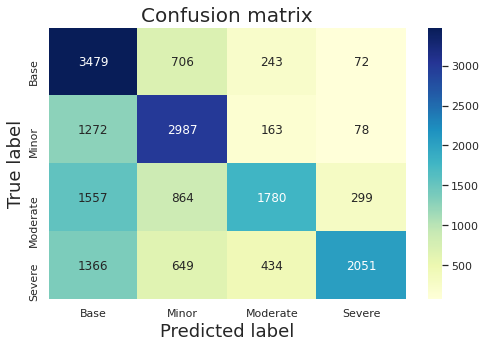

In [9]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

<AxesSubplot:xlabel='Predicted label', ylabel='True label'>

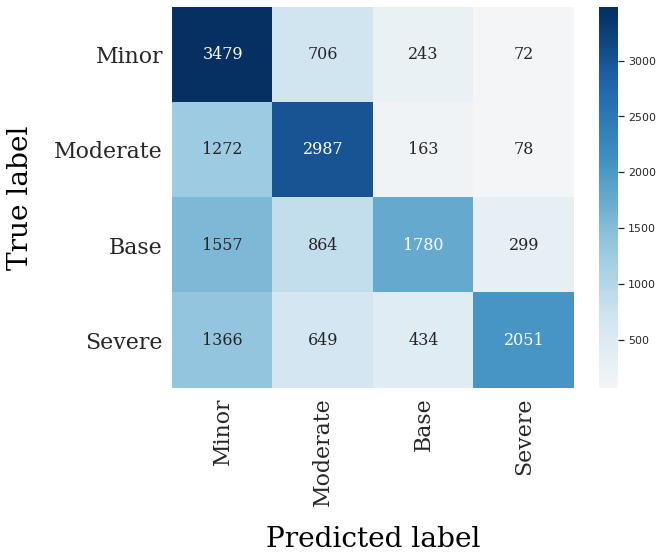

In [10]:
classes = np.array(['Minor', 'Moderate', 'Base', 'Severe'])
import matplotlib.pyplot as plt
import seaborn as sns

def confusion_matrix_normalized(cm,group):
    font = {'family': 'serif',
            'color':  'black',
            'weight': 'normal'}
    sns.set()

    fig, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(cm, annot=True, fmt="d", cmap="RdBu", center=0, xticklabels=classes, yticklabels=classes, annot_kws={'family': 'serif', "size": 16}) #Blues,Oranges,Reds,YlGnBu
    ax.set(xticklabels=classes, yticklabels=classes)
    plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
    plt.setp(ax.get_xticklabels(), rotation=90, ha="center")
    ax.set_ylabel('True label',fontsize=28, fontdict=font, labelpad=20)
    ax.set_xlabel('Predicted label',fontsize=28, fontdict=font, labelpad=20)
   
    hfont = {'fontname':'serif'}
    plt.yticks(fontsize=22, **hfont)
    plt.xticks(fontsize=22, **hfont)


    return ax


# act = df_original['Sub_class_New'].array
# pred_paper = df_original['category'].array
# pred_unlearn = df_unlearn['category'].array

act = data_train['class_degree'].array
pred = data_train['category'].array

# Compute confusion matrices
cm_base = confusion_matrix(act, pred)
# cm_unlearn = confusion_matrix(act, pred_unlearn)

# Compute the difference matrix
cm_diff = cm_base

cm = cm_diff 
group = 'with all groups'
confusion_matrix_normalized(cm,group)